In [3]:
# Import required libraries
import os
from pydub import AudioSegment, silence 
import matplotlib.pyplot as plt
import numpy as np
import wave

In [30]:
# shows the sound waves
def visualize(path: str,sil=None):
    raw = wave.open(path)
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")
    # signal = np.frombuffer(signal, dtype ="int8")
    f_rate = raw.getframerate()
    time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
    plt.figure(1)
    plt.title("Sound Wave")
    plt.xlabel("Time")
    plt.plot(time, signal)
    if sil:
        for i in sil:
            plt.axvline(x=i[0], color='red') 
            plt.axvline(x=i[1], color='yellow')
    plt.show()
    # wav_obj = wave.open(path)
    # sample_freq = wav_obj.getframerate()
    # n_samples = wav_obj.getnframes()
    # t_audio = n_samples/sample_freq
    # n_channels = wav_obj.getnchannels()
    # print(t_audio, n_channels)

    # signal_wave = wav_obj.readframes(n_samples)
    # signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    # l_channel = signal_array[0::2]
    # r_channel = signal_array[1::2]
    # times = np.linspace(0, n_samples/sample_freq, num=n_samples)

    # plt.figure(figsize=(15, 5))
    # plt.plot(times, signal_array)
    # plt.title('Left Channel')
    # plt.ylabel('Signal Value')
    # plt.xlabel('Time (s)')
    # plt.xlim(0, t_audio)
    # plt.show()

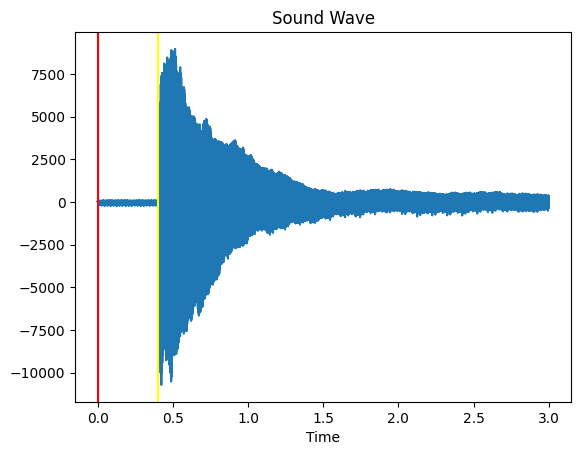

In [31]:
# Pass audio path
# file ='../assets/audio01.wav'
file ='../assets/noise.wav'
assert os.path.isfile(file)

myaudio = AudioSegment.from_wav(file)

silenc = silence.detect_silence(myaudio, min_silence_len=10, silence_thresh=-50)
silenc = [((start/1000),(stop/1000)) for start,stop in silenc]
# print(silenc)

visualize(file,silenc)